# Chapter 1 - Firsts steps with tensorflow

### Algoritmo de classificação de digitos numéricos manuais

#### imports

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

There are three ways of creating a model in tf.keras: Sequential API, Functional API, and Model subclassing. In this chapter we will use the simplest one, Sequential(), while the other two are discussed in Chapter 2, TensorFlow 1.x and 2.x. A Sequential() model is a linear pipeline (a stack) of neural network layers. This code fragment defines a single layer with 10 artificial neurons that expects 784 input variables (also known as features). Note that the net is "dense," meaning that each neuron in a layer is connected to all neurons located in the previous layer, and to all the neurons in the following layer:

(Página 7). 

#### Network and training parameters

In [2]:
EPOCHS = 30 #Quanto tempo o treino deve durar
BATCH_SIZE = 128 #Numero de amostrar inseridas na rede por vez
VERBOSE = 1 
NB_CLASSES = 10 #Numero de saidas (respostas) = numero de digitos
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 #Porcentagem de dados separados para teste

#### Loading MNIST Dataset

verify 

You can verify that the split between train and test is 60,000, and 10,000 respectively.

Labels have one-hot representation.is automatically applied


In [3]:
mnist = keras.datasets.mnist
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Text(0.5, 1.0, 'Esse dígito é o 0')

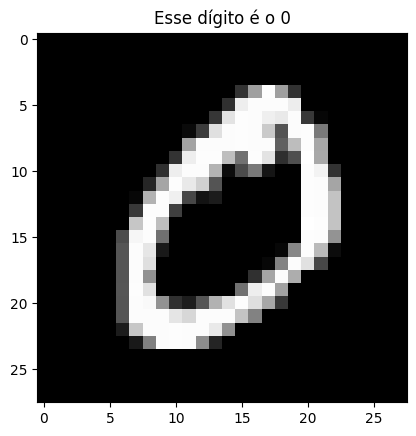

In [17]:

plot = plt.imshow(X_train[1],cmap="gray")
plt.title(f"Esse dígito é o {Y_train[1]}")

In [5]:
Y_train[0]

5

In [6]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
Y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

#### PreProccessing the data

In [8]:
# X_train is 60000 rows of 28x28 values; we --> reshape it to 
# 60000 x 784.
RESHAPED = 784
X_train = X_train.reshape(60000,RESHAPED) #o que o reshape faz?
X_test = X_test.reshape(10000,RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
X_train.shape

(60000, 784)

In [10]:
# Normalize inputs to be within in [0, 1].
X_train /= 255 #255 é o valor máx do pixel
X_test /= 255
print(X_train.shape[0], 'train samples') 


60000 train samples


In [11]:
print(X_test.shape[0], 'test samples')

10000 test samples


In [12]:
X_train.shape

(60000, 784)

In [13]:
# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES) #categorizando os dados em 0 e 1 para cada número, onde o total de colunas são as classes de saída 0 ao 9
Y_test = tf.keras.utils.to_categorical(Y_test,NB_CLASSES)
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Construindo o modelo

In [14]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,input_shape=(RESHAPED,),name='dense_layer',activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN,name='dense_layer_2',activation='relu'))
model.add(keras.layers.Dense(NB_CLASSES,name='dense_layer_3',activation='softmax'))
#Input_shape é a forma da entrada, no caso 784 neurônios, que representa um neuronio para cada pixel da imagem que é 28x28 pixels

In [15]:
#summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Compilando o modelo
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
#Treinando o modelo
model.fit(X_train,Y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)

Epoch 1/30
375/375 [==============================] - 5s 6ms/step - loss: 1.5557 - accuracy: 0.6206 - val_loss: 0.7758 - val_accuracy: 0.8472
Epoch 2/30
375/375 [==============================] - 1s 4ms/step - loss: 0.6056 - accuracy: 0.8539 - val_loss: 0.4546 - val_accuracy: 0.8826
Epoch 3/30
375/375 [==============================] - 1s 4ms/step - loss: 0.4412 - accuracy: 0.8811 - val_loss: 0.3746 - val_accuracy: 0.8993
Epoch 4/30
375/375 [==============================] - 1s 3ms/step - loss: 0.3818 - accuracy: 0.8936 - val_loss: 0.3375 - val_accuracy: 0.9070
Epoch 5/30
375/375 [==============================] - 1s 4ms/step - loss: 0.3482 - accuracy: 0.9018 - val_loss: 0.3143 - val_accuracy: 0.9101
Epoch 6/30
375/375 [==============================] - 1s 4ms/step - loss: 0.3252 - accuracy: 0.9075 - val_loss: 0.2952 - val_accuracy: 0.9154
Epoch 7/30
375/375 [==============================] - 1s 4ms/step - loss: 0.3075 - accuracy: 0.9125 - val_loss: 0.2814 - val_accuracy: 0.9188
Epoch 

In [18]:
#evluate_model
test_loss, test_acc = model.evaluate(X_test,Y_test)
print('Test_Accuracy',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1596 - accuracy: 0.9525
Test_Accuracy 0.9524999856948853


In [21]:
tf.keras.utils.plot_model(model,to_file = "model.png")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
